<a href="https://colab.research.google.com/github/scrawnypowder9/Laptop_sales/blob/main/Laptop_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d ashaychoudhary/indian-laptop-purchase-dataset-online-and-offline

Dataset URL: https://www.kaggle.com/datasets/ashaychoudhary/indian-laptop-purchase-dataset-online-and-offline
License(s): MIT
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 1.42MB/s]


In [ ]:
!unzip indian-laptop-purchase-dataset-online-and-offline.zip

Archive:  indian-laptop-purchase-dataset-online-and-offline.zip
  inflating: laptop_purchase_data_india.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
laptop_data = pd.read_csv('laptop_purchase_data_india.csv')

In [ ]:
laptop_data.head(1)

,Customer_ID,Age,Gender,City,Income_Level,Purchase_Mode,Brand_Purchased,Price_Range,Payment_Mode,Purchase_Frequency,Satisfaction_Rating
0,CUST00001,56,Male,Pune,Low,Online,Dell,30K-50K,UPI,Rare,4


In [ ]:
laptop_data.rename(columns={'Customer_ID':'Customer ID',
                            'Income_Level':'Income Level',
                            'Purchase_Mode':'Purchase Mode',
                            'Brand_Purchased':'Brand Purchased',
                            'Price_Range':'Price Range',
                            'Payment_Mode':'Payment Mode',
                            'Purchase_Frequency':'Purchase Frequency',
                            'Satisfaction_Rating':'Satisfaction Rating'}, inplace=True)

In [ ]:
laptop_data.isna().sum()

,0
Customer ID,0
Age,0
Gender,0
City,0
Income Level,0
Purchase Mode,0
Brand Purchased,0
Price Range,0
Payment Mode,0
Purchase Frequency,0


no missing values in the data set.

In [ ]:
laptop_data.dtypes

,0
Customer ID,object
Age,int64
Gender,object
City,object
Income Level,object
Purchase Mode,object
Brand Purchased,object
Price Range,object
Payment Mode,object
Purchase Frequency,object


In [ ]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer ID          5000 non-null   object
 1   Age                  5000 non-null   int64 
 2   Gender               5000 non-null   object
 3   City                 5000 non-null   object
 4   Income Level         5000 non-null   object
 5   Purchase Mode        5000 non-null   object
 6   Brand Purchased      5000 non-null   object
 7   Price Range          5000 non-null   object
 8   Payment Mode         5000 non-null   object
 9   Purchase Frequency   5000 non-null   object
 10  Satisfaction Rating  5000 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 429.8+ KB


In [ ]:
laptop_data['Purchase Mode'].value_counts()

,count
Purchase Mode,
Online,3405
Offline,1595


most people prefer online purchases over in person

# Plots

In [ ]:
#we are going to do some plots using seaborn and matplotlib

In [ ]:
laptop_data.describe()

,Age,Satisfaction Rating
count,5000.000000,5000.000000
mean,38.662200,2.994200
std,12.028492,1.416957
min,18.000000,1.000000
25%,28.000000,2.000000
50%,39.000000,3.000000
75%,49.000000,4.000000
max,59.000000,5.000000


- std of 12 shows greater dispersion in ages between the subjects. means individual ages differ by about 12 years
- the mean of about 3 suggests that on average the satisfaction is good.
- count shows us the data has 5000 subjects which can be confirmed by running df.shape code

In [ ]:
laptop_data.head()

,Customer ID,Age,Gender,City,Income Level,Purchase Mode,Brand Purchased,Price Range,Payment Mode,Purchase Frequency,Satisfaction Rating
0,CUST00001,56,Male,Pune,Low,Online,Dell,30K-50K,UPI,Rare,4
1,CUST00002,46,Female,Kolkata,Medium,Online,MSI,Below 30K,Cash,Occasional,2
2,CUST00003,32,Male,Bangalore,Low,Online,Samsung,80K-1.2L,UPI,Occasional,3
3,CUST00004,25,Female,Jaipur,Medium,Offline,Samsung,Below 30K,Credit Card,Rare,4
4,CUST00005,38,Female,Pune,High,Online,MSI,80K-1.2L,Cash,Rare,3


In [ ]:
laptop_data['City'].value_counts()

,count
City,
Chennai,576
Hyderabad,566
Ahmedabad,565
Pune,561
Delhi,561
Mumbai,561
Kolkata,554
Bangalore,539
Jaipur,517


Text(0.5, 1.0, 'Sales Distribution per City')

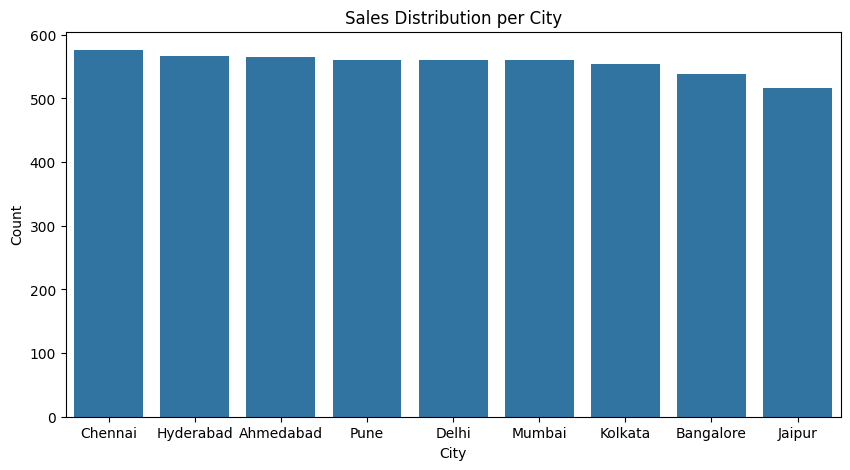

In [ ]:
#first plot
#1. plot sales per city
#create a new variable to represent count on city column
city_count = laptop_data['City'].value_counts()
#plot the counts
plt.figure(figsize=(10, 5))
sns.barplot(x=city_count.index, y=city_count.values)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Sales Distribution per City')

- customer count seems to be evenly distributed across the cities.
- although Jaipur has the lowest count

Text(0.5, 1.0, 'Customer Distribution by Gender')

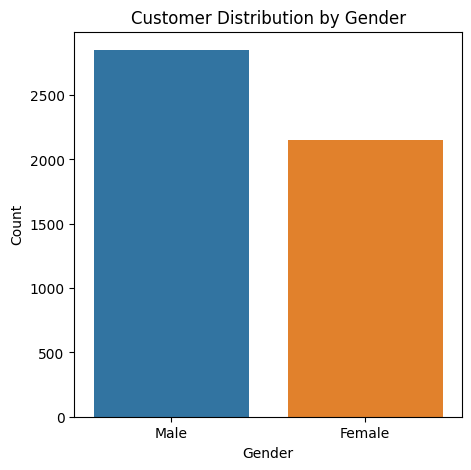

In [ ]:
#2 plot on gender distribution in the customer count
#create a variable for gender count
gender_count = laptop_data['Gender'].value_counts()
#plot the variable
plt.figure(figsize=(5, 5))
sns.barplot(x=gender_count.index, y=gender_count.values, hue= gender_count.index)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Customer Distribution by Gender')
#using 'hue' in plotting allows you to color the bars based on a certain variable. in this case based on gender which is represented by 'gender_count.index

more male customers than female

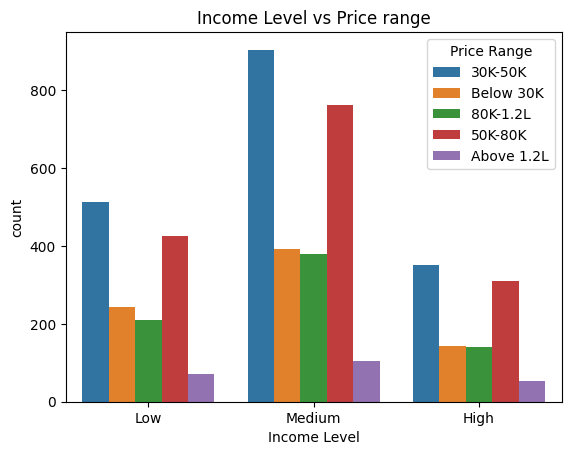

In [ ]:
#purchase patterns - income level vs price range
sns.countplot(data = laptop_data, x='Income Level', hue = 'Price Range')
plt.title('Income Level vs Price range')
plt.show()

- shows distribution of laptop price ranges in various income levels. for instance in low income level, most customers purchased laptops that costed 30k-50k and 50k-80k. Although this seems to be the trend across the income levels.

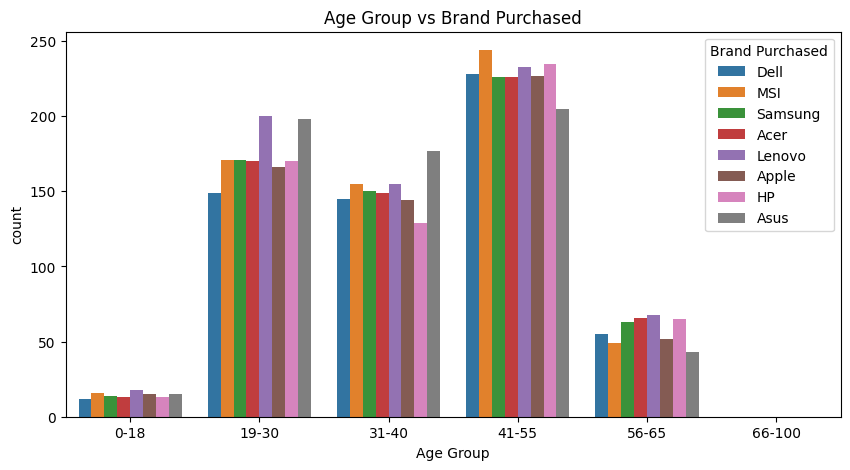

In [ ]:
#brand purchased based on age group
#create an age group variable
age_group = pd.cut(laptop_data['Age'], bins= [0, 18, 30, 40, 55, 65, 100], labels = ['0-18', '19-30', '31-40', '41-55', '56-65', '66-100'])
#add it to the data frame
laptop_data['Age Group'] = age_group
#plot laptops purchased based on age group
plt.figure(figsize=(10, 5))
sns.countplot(data = laptop_data, x='Age Group', hue = 'Brand Purchased')
plt.title('Age Group vs Brand Purchased')
plt.show()

insights
- 41-55 age group seems to be the biggest customers for all brands
- MSI is mostly popular among 41-55 year olds.
- data doesn't have age beyond 65, as 59 is the max age

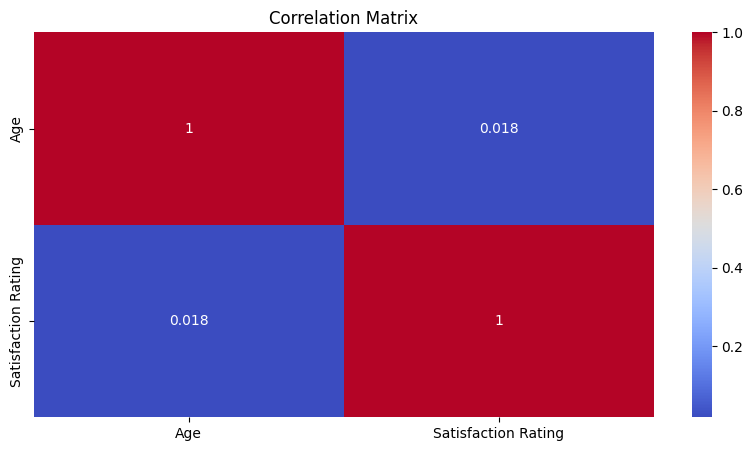

In [ ]:
#correlation
correlation_matrix = laptop_data.corr(method='pearson', numeric_only=True)
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


-Age seems to have a weakly positive correlation with satisfaction rating. still; it implies that older people are more likely to provide a positive/higher rating

# Predictive Analysis

In [ ]:
#traintest splits dataset into training and testing subsets
from sklearn.model_selection import train_test_split

In [ ]:
#randomforestclassifier is an ML algorithm based on an ensemble of tree decisions. combines multiple trees to improve predictive accuracy
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#ML Models cannot process categorical data directly. so pd.get_dummies converts categorical columns into numeric forrmat. ie. gender, male female will be 0 and 1
laptop_data_encoded = pd.get_dummies(laptop_data, drop_first=True)

In [ ]:
#this input features contains all columns except the target column; 'satisfaction rating' hence it's dropped
x=laptop_data_encoded.drop('Satisfaction Rating', axis=1)
#the target or dependent variable y is what we are predicting
y=laptop_data_encoded['Satisfaction Rating']

In [ ]:
#split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
#test_size=0.2 reserves 20% of the data for testing and random_state=42 ensures reproducibility by fixing the random seed

In [ ]:
#this initializes the model with default parameters. it constructs multiple decision trees using random subsets of data and combines predictions from all trees via majority vote to make the final prediction
model = RandomForestClassifier()
#this trains the model using the training data
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
#this calculates the accuracy of the model on the testing data
print('Model Accuracy:', model.score(x_test, y_test))

Model Accuracy: 0.159


A model accuracy of .159 means the random forest classifier is predicting the correct satisfaction rating 15.9% of the time on the test data. this is a low accuracy, indicating the model is performing poorly

**Summary of the model**
- prepares the dataset by encoding and splitting
- trains a random forest model on 80% of the data
- evaluates the model's accuracy on the remaining 20%

In [ ]:
#make predictions on the test data
y_pred = model.predict(x_test)
#display the predictions
print('Predicted Satisfaction Ratings:', y_pred[:20])

Predicted Satisfaction Ratings: [1 5 2 3 2 5 1 2 2 5 2 1 2 2 5 1 4 5 2 3]


In [ ]:
#compare with actual values
print('Actual Satisfaction Ratings:', y_test.values[:20])

Actual Satisfaction Ratings: [5 5 4 5 5 2 3 5 1 3 5 1 1 5 2 1 5 3 3 1]
